In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import matrix, linalg
import pandas as pd
from tensorflow import keras

In [4]:
# Load the training data
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')

train_data = train.values
print(train_data[:,0])

[1 0 1 ... 7 6 9]


In [5]:
def visualize_digit(features, label):
    # Digits are stored as a vector of 784 pixel values. Here we
    # reshape it to a 28x28 image so we can display it.
    plt.imshow(features.reshape(28, 28), cmap="binary")
    plt.xlabel("Digit with label " + str(label))
    plt.show()

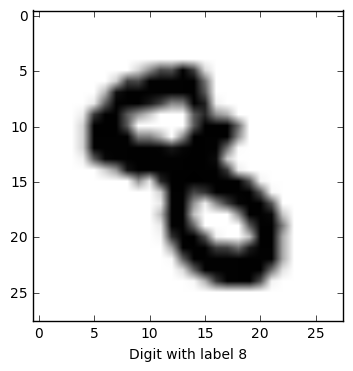

In [6]:
train_features = train_data[:,1:]
train_labels = train_data[:,0]

sample1_feat = train_features[67]
sample1_label = train_labels[67]

visualize_digit(sample1_feat, sample1_label)

In [19]:
# Linear regression

# TODO: Solve the linear regression problem, regressing
# X = train_features against y = train_labels
X = (train_features / 255)   # normalization 

#print(X.shape, y.shape, np.transpose(X))
y = train_labels / 255

test = test / 255

print(X, len(y))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] 42000


In [20]:
Xnew = X.reshape(-1, 784)
ynew = y.reshape(-1, 1)

X = Xnew.astype('float64')
y = ynew.astype('float64')
test = test.astype('float64')

In [21]:
model = keras.Sequential([keras.layers.Dense(10, 'softmax')])

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.fit(X, y,batch_size=20,epochs=20,verbose=0)

In [22]:
pred_test = model.predict(test)
pred_test = pred_test.argmax(axis=1)